In [88]:
import numpy as np
import pandas as pd
import glob, h5py
from scipy.io import loadmat

import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

from impdar.lib.load import load
from impdar.lib.process import concat

In [89]:
### Load the processed reflectivity dataframe ###

df = pd.read_csv('../../proc/Processed_Reflectivity.csv')

In [90]:
# import subglacial lake outlines (Siegfried & Fricker, 2018)
h5f = h5py.File('../../data/outlines/test.h5', 'r')

### Whillans Subglacial Lake Elevations
slw_dat = pd.read_csv('../../data/is/slw_elevs.dat')
slw_y = slw_dat['#num month (since 2010)'].values
slw_in = slw_dat['mean elev IN'].values
slw_out = slw_dat['mean elev OUT'].values

### Engelhardt Subglacial Lake Elevations
sle_dat = pd.read_csv('../../data/is/sle_elevs.dat')
sle_y = sle_dat['#num month (since 2010)'].values
sle_in = sle_dat['mean elev IN'].values
sle_out = sle_dat['mean elev OUT'].values

### Lake 7/8 Subglacial Lake Elevations
l78_dat = pd.read_csv('../../data/is/l78_elevs.dat')
l78_y = l78_dat['#num month (since 2010)'].values
l78_in = l78_dat['mean elev IN'].values
l78_out = l78_dat['mean elev OUT'].values

### Lake 10 Subglacial Lake Elevations
l10_dat = pd.read_csv('../../data/is/l10_elevs.dat')
l10_y = l10_dat['#num month (since 2010)'].values
l10_in = l10_dat['mean elev IN'].values
l10_out = l10_dat['mean elev OUT'].values

In [91]:
base_dir = '/Users/benhills/Desktop/cresis/data.cresis.ku.edu/data/rds/2013_Antarctica_Basler/'
standard_dir = base_dir + 'CSARP_standard/'
layer_dir = base_dir + 'CSARP_layerData/'
dname = standard_dir + '20140108_02'
fnames = glob.glob(dname+'/*img_02*.mat')
if len(fnames) == 0:
    fnames = glob.glob(dname+'/Data*.mat')
fname = fnames[0]
dat1 = load('mcords_mat',fname)[0]
dat1.get_projected_coords('epsg:3031')   
layers = loadmat(layer_dir+dname[len(standard_dir):]+'/Data'+fname[-20:])['layerData']
b1 = layers[0][1][0][0][0][0][1][0][0][0][0]
s1 = layers[0][0][0][0][0][0][1][0][0][0][0]
bsamp1 = np.zeros_like(b1)
ssamp1 = np.zeros_like(s1)
p1 = np.empty_like(b1)
for trace in range(dat1.tnum):
    if np.isnan(b1[trace]):
        bsamp1[trace] = np.nan
        p1[trace] = np.nan
    else:
        b_idx = np.argmin(abs(b1[trace]-dat1.travel_time*1e-6))
        bsamp1[trace] = b_idx
        p1[trace] = np.max(dat1.data[b_idx-40:b_idx+40,trace])
    ### Reset the trace so that the first sample is at the ice surface rather than the airplane (for plotting) ###
    if np.isnan(s1[trace]):
        s_idx = 1
        ssamp1[trace] = np.nan
    else:
        s_idx = np.argmin(abs(s1[trace]-dat1.travel_time*1e-6))
        ssamp1[trace] = s_idx
    dat1.data[:-s_idx,trace] = dat1.data[s_idx:,trace]
    dat1.data[-s_idx:,trace] = np.nan
 

dname = standard_dir + '20140104_05'
fnames = glob.glob(dname+'/*img_02*.mat')
if len(fnames) == 0:
    fnames = glob.glob(dname+'/Data*.mat')
fname = fnames[1]
dat2 = load('mcords_mat',fname)[0]
dat2.get_projected_coords('epsg:3031')    

layers = loadmat(layer_dir+dname[len(standard_dir):]+'/Data'+fname[-20:])['layerData']
b2 = layers[0][1][0][0][0][0][1][0][0][0][0]
s2 = layers[0][0][0][0][0][0][1][0][0][0][0]
bsamp2 = np.zeros_like(b2)
ssamp2 = np.zeros_like(s2)
p2 = np.empty_like(b2)
for trace in range(dat2.tnum):
    if np.isnan(b2[trace]):
        bsamp2[trace] = np.nan
        p2[trace] = np.nan
    else:
        b_idx = np.argmin(abs(b2[trace]-dat2.travel_time*1e-6))
        bsamp2[trace] = b_idx
        p2[trace] = np.max(dat2.data[b_idx-40:b_idx+40,trace])
    ### Reset the trace so that the first sample is at the ice surface rather than the airplane (for plotting) ###
    if np.isnan(s2[trace]):
        s_idx = 1
        ssamp2[trace] = np.nan
    else:
        s_idx = np.argmin(abs(s2[trace]-dat2.travel_time*1e-6))
        ssamp2[trace] = s_idx
    dat2.data[:-s_idx,trace] = dat2.data[s_idx:,trace]
    dat2.data[-s_idx:,trace] = np.nan
        
fname = fnames[2]
dat3 = load('mcords_mat',fname)[0]
dat3.get_projected_coords('epsg:3031')
layers = loadmat(layer_dir+dname[len(standard_dir):]+'/Data'+fname[-20:])['layerData']
b3 = layers[0][1][0][0][0][0][1][0][0][0][0]
s3 = layers[0][0][0][0][0][0][1][0][0][0][0]
bsamp3 = np.zeros_like(b3)
ssamp3 = np.zeros_like(s3)
p3 = np.empty_like(b3)
for trace in range(dat3.tnum):
    if np.isnan(b3[trace]):
        bsamp3[trace] = np.nan
        p3[trace] = np.nan
    else:
        b_idx = np.argmin(abs(b3[trace]-dat3.travel_time*1e-6))
        bsamp3[trace] = b_idx
        p3[trace] = np.max(dat3.data[b_idx-40:b_idx+40,trace])
    ### Reset the trace so that the first sample is at the ice surface rather than the airplane (for plotting) ###
    if np.isnan(s3[trace]):
        s_idx = 1
        ssamp3[trace] = np.nan
    else:
        s_idx = np.argmin(abs(s3[trace]-dat3.travel_time*1e-6))
        ssamp3[trace] = s_idx
    dat3.data[:-s_idx,trace] = dat3.data[s_idx:,trace]
    dat3.data[-s_idx:,trace] = np.nan
        
fname = fnames[0]
dat4 = load('mcords_mat',fname)[0]
dat4.get_projected_coords('epsg:3031')
layers = loadmat(layer_dir+dname[len(standard_dir):]+'/Data'+fname[-20:])['layerData']
b4 = layers[0][1][0][0][0][0][1][0][0][0][0]
s4 = layers[0][0][0][0][0][0][1][0][0][0][0]
bsamp4 = np.zeros_like(b4)
ssamp4 = np.zeros_like(s4)
p4 = np.empty_like(b4)
for trace in range(dat4.tnum):
    if np.isnan(b4[trace]):
        bsamp4[trace] = np.nan
        p4[trace] = np.nan
    else:
        b_idx = np.argmin(abs(b4[trace]-dat4.travel_time*1e-6))
        bsamp4[trace] = b_idx
        p4[trace] = np.max(dat4.data[b_idx-40:b_idx+40,trace])
    ### Reset the trace so that the first sample is at the ice surface rather than the airplane (for plotting) ###
    if np.isnan(s4[trace]):
        s_idx = 1
        ssamp4[trace] = np.nan
    else:
        s_idx = np.argmin(abs(s4[trace]-dat4.travel_time*1e-6))
        ssamp4[trace] = s_idx
    dat4.data[:-s_idx,trace] = dat4.data[s_idx:,trace]
    dat4.data[-s_idx:,trace] = np.nan
        
dat1.hcrop(75,'left')
dat2.hcrop(dat2.tnum-280,'right')
dat = concat([dat4,dat3,dat2,dat1])[0]
dat.hcrop(12750,'right')
dat.hcrop(1050,'left')
dat.elev = np.nan*np.ones(dat.tnum)
dat.reverse()

p = np.append(p4,np.append(p3,np.append(p2[:dat2.tnum],p1[75:])))[1050:12750][::-1]
s = np.append(s4,np.append(s3,np.append(s2[:dat2.tnum],s1[75:])))[1050:12750][::-1]
b = np.append(b4,np.append(b3,np.append(b2[:dat2.tnum],b1[75:])))[1050:12750][::-1]

### Correct the bed power for spreading and attenuative losses ###
epsr_ice = 3.15
H = (b-s)*169e6/2.
h = s*300e6
G = 20*np.log10(2.*(h + H/np.sqrt(epsr_ice)))
N = 10
L = 2*N*H/1000.
r_rel = p + G + L
r_rel -= np.nanmean(r_rel)

### Adjust time and depth vectors for updated array ###
dat.travel_time -= dat.travel_time[0]
depth = dat.travel_time*169/2.

### Linear gain for plotting ###
dat.data += np.transpose(np.tile(np.linspace(0,20,dat.snum),(dat.tnum,1)))

Objects concatenated
Profile direction reversed


In [92]:
lake = 'WhillansSubglacialLake'
lake_dists = np.empty_like(dat.x_coord)
for ii in range(len(dat.x_coord)):
    xx = dat.x_coord[ii]
    yy = dat.y_coord[ii]
    dist = np.sqrt((xx-np.squeeze(h5f[lake]['x'][:]))**2. + (yy-np.squeeze(h5f[lake]['y'][:]))**2.)
    lake_dists[ii] = min(dist)

lake_start = 0
lake_end = 0

i, ddist = 0, 0.
while ddist <= 0.:
    i += 1
    ddist = lake_dists[i] - lake_dists[i-1]
lake_start = i

i, ddist = len(lake_dists)-1, 0.
while ddist <= 0.:
    i -= 1
    ddist = lake_dists[i] - lake_dists[i+1]
lake_end = i

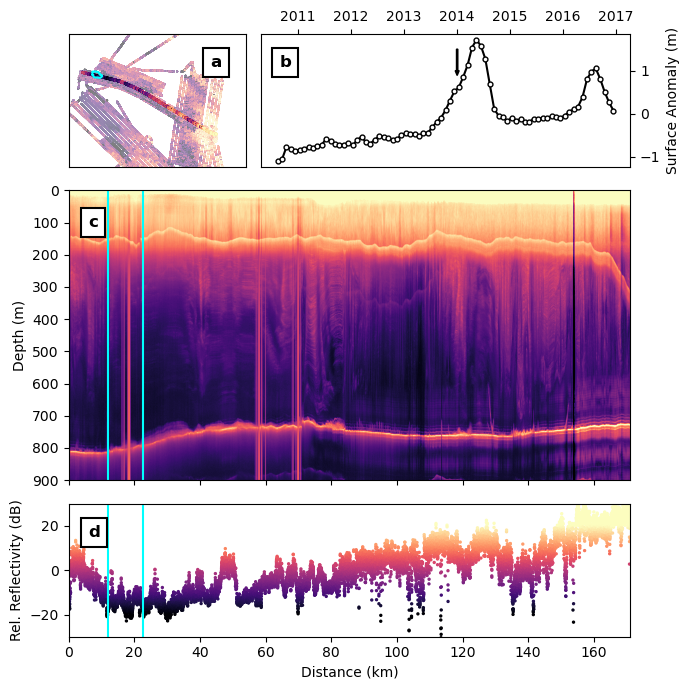

In [93]:
%matplotlib inline

plt.figure(figsize=(7,7))
gs = GridSpec(4,6)

start = 180
end = 950
bound_color='cyan'

### Panel A - Map View ###

ax1 = plt.subplot(gs[0,:2])
ax1.tick_params(labelleft=False,labelbottom=False,left=False,bottom=False)
plt.scatter(df['X'],df['Y'],c=df['Relative Reflectivity'],zorder=1,cmap='magma',s=.1,vmin=-20,vmax=20,rasterized=True)
plt.fill_between(np.linspace(-1e8,1e8,10),-1e8,1e8,color='w',alpha=0.5)
plt.scatter(dat.x_coord,dat.y_coord,c=r_rel,s=1,zorder=2,cmap='magma',vmin=-20,vmax=20,rasterized=True)
lake = 'WhillansSubglacialLake'
plt.plot(np.squeeze(h5f[lake]['x'][:]),np.squeeze(h5f[lake]['y'][:]),c=bound_color,zorder=3)
plt.axis('equal')
plt.xlim(-300000,-120000)
plt.ylim(-660000,-520000)
ax1.text(0.8,.75,'a',transform=ax1.transAxes,fontweight='bold',fontsize=12,
         bbox=dict(facecolor='w', edgecolor='k', pad=5.0, linewidth=1.5))

### Panel B - Ice Surface through Time ###

radar_decyr = 2014+4/365.
ax2 = plt.subplot(gs[0,2:6])
plt.plot(slw_y,slw_in-slw_out,'k-o',mfc='w',ms=3.5)
plt.arrow(radar_decyr,1.5,0,-.5,color='k',width=0.025)
ax2.xaxis.tick_top()
ax2.xaxis.set_label_position("top")
ax2.yaxis.tick_right()
ax2.yaxis.set_label_position("right")
ax2.text(0.05,.75,'b',transform=ax2.transAxes,fontweight='bold',fontsize=12,
         bbox=dict(facecolor='w', edgecolor='k', pad=5.0, linewidth=1.5))
plt.ylabel('Surface Anomaly (m)')

### Panel C - Radar Image ###

ax3 = plt.subplot(gs[1:3,:6])
ax3.tick_params(labelbottom=False)
plt.imshow(dat.data,aspect='auto',vmin=-165,vmax=-100,cmap='magma',
          extent=[0,np.max(dat.dist),max(depth),min(depth)],rasterized=True)
plt.axvline(dat.dist[lake_start],color='cyan')
plt.axvline(dat.dist[lake_end],color='cyan')
plt.ylim(900,0)
plt.ylabel('Depth (m)')
ax3.text(0.035,.875,'c',transform=ax3.transAxes,fontweight='bold',fontsize=12,
         bbox=dict(facecolor='w', edgecolor='k', pad=5.0, linewidth=1.5))

### Panel D - Bed Echo Power ###

ax4 = plt.subplot(gs[3,:6],sharex=ax3)
plt.scatter(dat.dist,r_rel,c=r_rel,vmin=-20,vmax=20,s=2,rasterized=True,cmap='magma')
plt.axvline(dat.dist[lake_start],color='cyan')
plt.axvline(dat.dist[lake_end],color='cyan')
plt.ylabel('Rel. Reflectivity (dB)')
plt.xlabel('Distance (km)')
ax4.text(0.035,.75,'d',transform=ax4.transAxes,fontweight='bold',fontsize=12,
         bbox=dict(facecolor='w', edgecolor='k', pad=5.0, linewidth=1.5))
plt.ylim(-30,30)

### Cleanup and Save ###
plt.tight_layout()
plt.savefig('fig-S2-1.png',dpi=300)

In [94]:
dname = standard_dir + '20140102_03'
fname = dname + '/Data_img_02_20140102_03_003.mat'
dat = load('mcords_mat',fname)[0]
dat.get_projected_coords('epsg:3031')    

layers = loadmat(layer_dir+dname[len(standard_dir):]+'/Data'+fname[-20:])['layerData']
b = layers[0][1][0][0][0][0][1][0][0][0][0]
s = layers[0][0][0][0][0][0][1][0][0][0][0]
bsamp = np.zeros_like(b)
ssamp = np.zeros_like(s)
p = np.empty_like(b)
for trace in range(dat.tnum):
    if np.isnan(b[trace]):
        bsamp[trace] = np.nan
        p[trace] = np.nan
    else:
        b_idx = np.argmin(abs(b[trace]-dat.travel_time*1e-6))
        bsamp[trace] = b_idx
    p[trace] = np.max(dat.data[b_idx-50:b_idx+50,trace])
    ### Reset the trace so that the first sample is at the ice surface rather than the airplane (for plotting) ###
    if np.isnan(s[trace]):
        s_idx = 1
        ssamp[trace] = np.nan
    else:
        s_idx = np.argmin(abs(s[trace]-dat.travel_time*1e-6))
        ssamp[trace] = s_idx
    dat.data[:-s_idx,trace] = dat.data[s_idx:,trace]
    dat.data[-s_idx:,trace] = np.nan
        
### Correct the bed power for spreading and attenuative losses ###
epsr_ice = 3.15
H = (b-s)*169e6/2.
h = s*300e6
G = 20*np.log10(2.*(h + H/np.sqrt(epsr_ice)))
N = 10
L = 2*N*H/1000.
r_rel = p + G + L
r_rel -= np.nanmean(r_rel)

### Adjust time and depth vectors for updated array ###
dat.travel_time -= dat.travel_time[0]
depth = dat.travel_time*169/2.

### Linear gain for plotting ###
dat.data += np.transpose(np.tile(np.linspace(0,20,dat.snum),(dat.tnum,1)))

In [95]:
lake = 'EngelhardtSubglacialLake'
lake_dists = np.empty_like(dat.x_coord)
for ii in range(len(dat.x_coord)):
    xx = dat.x_coord[ii]
    yy = dat.y_coord[ii]
    dist = np.sqrt((xx-np.squeeze(h5f[lake]['x'][:]))**2. + (yy-np.squeeze(h5f[lake]['y'][:]))**2.)
    lake_dists[ii] = min(dist)

lake_start = 0
lake_end = 0

i, ddist = 0, 0.
while ddist <= 0.:
    i += 1
    ddist = lake_dists[i] - lake_dists[i-1]
lake_start = i

i, ddist = len(lake_dists)-1, 0.
while ddist <= 0.:
    i -= 1
    ddist = lake_dists[i] - lake_dists[i+1]
lake_end = i

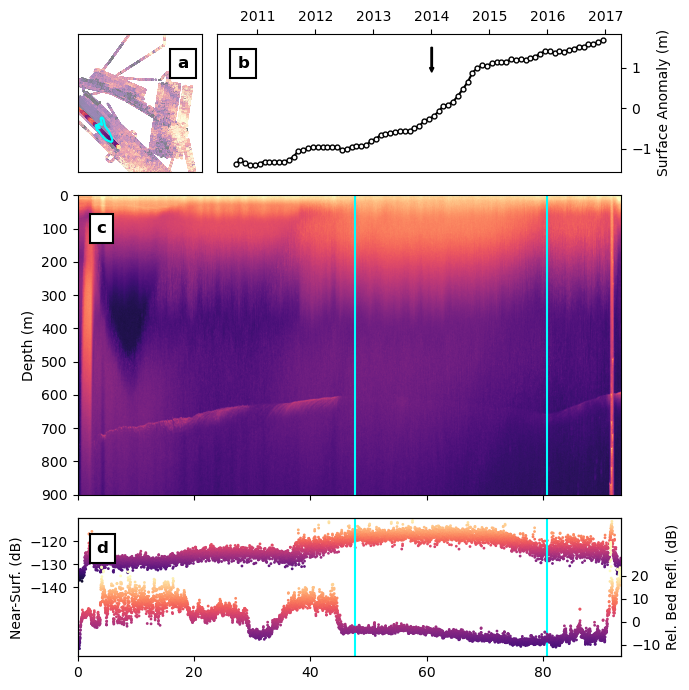

In [96]:
%matplotlib inline

plt.figure(figsize=(7,7))
gs = GridSpec(4,4)

start = 180
end = 950
bound_color='cyan'

### Panel A - Map View ###

ax1 = plt.subplot(gs[0,0])
ax1.tick_params(labelleft=False,labelbottom=False,left=False,bottom=False)
#show(img,cmap='Greys_r',ax=ax1,vmin=15000,vmax=17000,zorder=-1)
plt.scatter(df['X'],df['Y'],c=df['Relative Reflectivity'],zorder=1,cmap='magma',s=.1,vmin=-20,vmax=20,rasterized=True)
plt.fill_between(np.linspace(-1e8,1e8,10),-1e8,1e8,color='w',alpha=0.5)
plt.scatter(dat.x_coord,dat.y_coord,c=r_rel,s=1,zorder=2,cmap='magma',vmin=-20,vmax=20,rasterized=True)
lake = 'EngelhardtSubglacialLake'
plt.plot(np.squeeze(h5f[lake]['x'][:]),np.squeeze(h5f[lake]['y'][:]),c=bound_color,zorder=3)
plt.axis('equal')
plt.xlim(-300000,-120000)
plt.ylim(-660000,-520000)
ax1.text(0.8,.75,'a',transform=ax1.transAxes,fontweight='bold',fontsize=12,
         bbox=dict(facecolor='w', edgecolor='k', pad=5.0, linewidth=1.5))

### Panel B - Ice Surface through Time ###

radar_decyr = 2014+2/365.
ax2 = plt.subplot(gs[0,1:])
plt.plot(sle_y,sle_in-sle_out,'k-o',mfc='w',ms=3.5)
plt.arrow(radar_decyr,1.5,0,-.5,color='k',width=0.025)
ax2.xaxis.tick_top()
ax2.xaxis.set_label_position("top")
ax2.yaxis.tick_right()
ax2.yaxis.set_label_position("right")
ax2.text(0.05,.75,'b',transform=ax2.transAxes,fontweight='bold',fontsize=12,
         bbox=dict(facecolor='w', edgecolor='k', pad=5.0, linewidth=1.5))
plt.ylabel('Surface Anomaly (m)')

### Panel C - Radar Image ###

ax3 = plt.subplot(gs[1:3,:])
ax3.tick_params(labelbottom=False)
plt.imshow(dat.data,aspect='auto',vmin=-165,vmax=-100,cmap='magma',
          extent=[0,np.max(dat.dist),max(depth),min(depth)],rasterized=True)
plt.axvline(dat.dist[lake_start],color='cyan')
plt.axvline(dat.dist[lake_end],color='cyan')
plt.ylim(900,0)
plt.ylabel('Depth (m)')
ax3.text(0.035,.875,'c',transform=ax3.transAxes,fontweight='bold',fontsize=12,
         bbox=dict(facecolor='w', edgecolor='k', pad=5.0, linewidth=1.5))

### Panel D - Bed Echo Power ###

s = np.argmin(abs(depth-100))
nsp = dat.data[s]

ax4 = plt.subplot(gs[3,:],sharex=ax3)
plt.scatter(dat.dist,nsp,c=nsp,cmap='magma',s=1,vmin=-140,vmax=-110)
plt.axvline(dat.dist[lake_start],color='cyan')
plt.axvline(dat.dist[lake_end],color='cyan')
plt.ylim(-170,-110)
plt.yticks([-140,-130,-120])
plt.ylabel('Near-Surf. (dB)')
axt4 = plt.twinx(ax4)
plt.scatter(dat.dist,r_rel,c=r_rel,cmap='magma',s=1,vmin=-20,vmax=20)
plt.ylim(-15,45)
plt.yticks([-10,0,10,20])
plt.ylabel('Rel. Bed Refl. (dB)')
ax4.text(0.035,.75,'d',transform=ax4.transAxes,fontweight='bold',fontsize=12,
         bbox=dict(facecolor='w', edgecolor='k', pad=5.0, linewidth=1.5))

### Cleanup and Save ###
plt.tight_layout()
plt.savefig('fig-S2-2.png',dpi=300)

In [137]:
dname = standard_dir + '20140102_04'
fname = dname + '/Data_img_02_20140102_04_007.mat'
dat1 = load('mcords_mat',fname)[0]
dat1.get_projected_coords('epsg:3031')    

layers = loadmat(layer_dir+dname[len(standard_dir):]+'/Data'+fname[-20:])['layerData']
b1 = layers[0][1][0][0][0][0][1][0][0][0][0]
s1 = layers[0][0][0][0][0][0][1][0][0][0][0]
bsamp1 = np.zeros_like(b1)
ssamp1 = np.zeros_like(s1)
p1 = np.empty_like(b1)
for trace in range(dat1.tnum):
    if np.isnan(b1[trace]):
        bsamp1[trace] = np.nan
        p1[trace] = np.nan
    else:
        b_idx = np.argmin(abs(b1[trace]-dat1.travel_time*1e-6))
        bsamp1[trace] = b_idx
    p1[trace] = np.max(dat1.data[b_idx-50:b_idx+50,trace])
    ### Reset the trace so that the first sample is at the ice surface rather than the airplane (for plotting) ###
    if np.isnan(s1[trace]):
        s_idx = 1
        ssamp1[trace] = np.nan
    else:
        s_idx = np.argmin(abs(s1[trace]-dat1.travel_time*1e-6))
        ssamp1[trace] = s_idx
    dat1.data[:-s_idx,trace] = dat1.data[s_idx:,trace]
    dat1.data[-s_idx:,trace] = np.nan
    
fname = dname + '/Data_img_02_20140102_04_008.mat'
dat2 = load('mcords_mat',fname)[0]
dat2.get_projected_coords('epsg:3031')    

layers = loadmat(layer_dir+dname[len(standard_dir):]+'/Data'+fname[-20:])['layerData']
b2 = layers[0][1][0][0][0][0][1][0][0][0][0]
s2 = layers[0][0][0][0][0][0][1][0][0][0][0]
bsamp2 = np.zeros_like(b2)
ssamp2 = np.zeros_like(s2)
p2 = np.empty_like(b2)
for trace in range(dat2.tnum):
    if np.isnan(b2[trace]):
        bsamp2[trace] = np.nan
        p2[trace] = np.nan
    else:
        b_idx = np.argmin(abs(b2[trace]-dat2.travel_time*1e-6))
        bsamp1[trace] = b_idx
    p2[trace] = np.max(dat2.data[b_idx-50:b_idx+50,trace])
    ### Reset the trace so that the first sample is at the ice surface rather than the airplane (for plotting) ###
    if np.isnan(s2[trace]):
        s_idx = 1
        ssamp2[trace] = np.nan
    else:
        s_idx = np.argmin(abs(s2[trace]-dat2.travel_time*1e-6))
        ssamp1[trace] = s_idx
    dat2.data[:-s_idx,trace] = dat2.data[s_idx:,trace]
    dat2.data[-s_idx:,trace] = np.nan
    
b = np.append(b1,b2)
s = np.append(s1,s2)
p = np.append(p1,p2)
dat = concat([dat1,dat2])[0]
dat.elev = np.nan*np.ones(dat.tnum)
dat.reverse()
    
### Correct the bed power for spreading and attenuative losses ###
epsr_ice = 3.15
H = (b-s)*169e6/2.
h = s*300e6
G = 20*np.log10(2.*(h + H/np.sqrt(epsr_ice)))
N = 10
L = 2*N*H/1000.
r_rel = p + G + L
r_rel -= np.nanmean(r_rel)

r_rel = r_rel[::-1]

### Adjust time and depth vectors for updated array ###
dat.travel_time -= dat.travel_time[0]
depth = dat.travel_time*169/2.

### Linear gain for plotting ###
dat.data += np.transpose(np.tile(np.linspace(0,20,dat.snum),(dat.tnum,1)))

Objects concatenated
Profile direction reversed


In [140]:
lake = 'EngelhardtSubglacialLake'
lake_dists = np.empty_like(dat.x_coord)
for ii in range(len(dat.x_coord)):
    xx = dat.x_coord[ii]
    yy = dat.y_coord[ii]
    dist = np.sqrt((xx-np.squeeze(h5f[lake]['x'][:]))**2. + (yy-np.squeeze(h5f[lake]['y'][:]))**2.)
    lake_dists[ii] = min(dist)

lake_start = 0
lake_end = 0

i, ddist = 0, 0.
while ddist <= 0.:
    i += 1
    ddist = lake_dists[i] - lake_dists[i-1]
lake_start = i

i, ddist = len(lake_dists)-1, 0.
while ddist <= 0. or lake_dists[i] > 50.:
    i -= 1
    ddist = lake_dists[i] - lake_dists[i+1]
lake_end = i

(0.0, 1000.0)

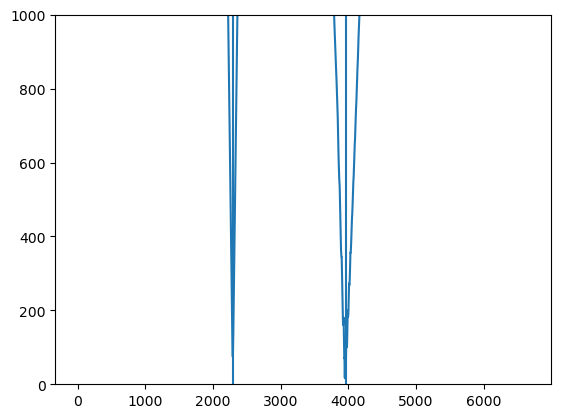

In [141]:
plt.figure()
plt.plot(lake_dists)
plt.axvline(lake_start)
plt.axvline(lake_end)
plt.ylim(0,1000)

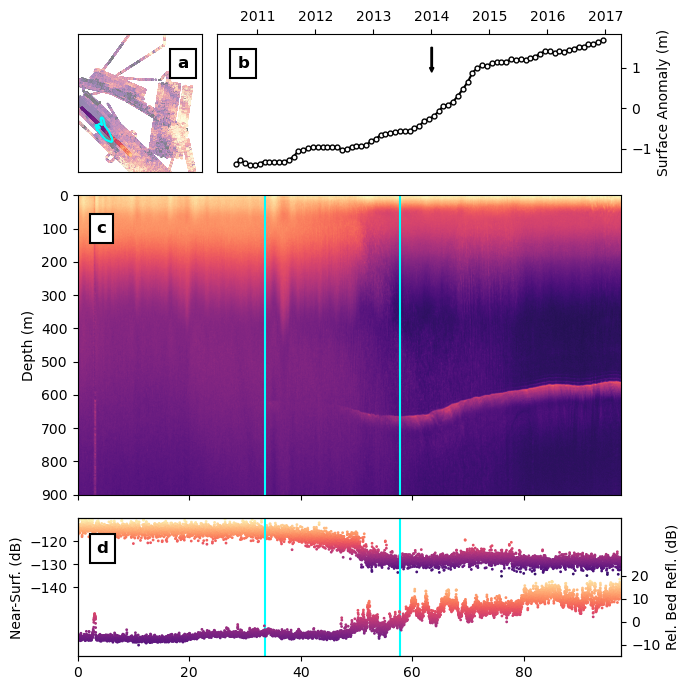

In [142]:
%matplotlib inline

plt.figure(figsize=(7,7))
gs = GridSpec(4,4)

start = 180
end = 950
bound_color='cyan'

### Panel A - Map View ###

ax1 = plt.subplot(gs[0,0])
ax1.tick_params(labelleft=False,labelbottom=False,left=False,bottom=False)
plt.scatter(df['X'],df['Y'],c=df['Relative Reflectivity'],zorder=1,cmap='magma',s=.1,vmin=-20,vmax=20,rasterized=True)
plt.fill_between(np.linspace(-1e8,1e8,10),-1e8,1e8,color='w',alpha=0.5)
plt.scatter(dat.x_coord,dat.y_coord,c=r_rel,s=1,zorder=2,cmap='magma',vmin=-20,vmax=20,rasterized=True)
lake = 'EngelhardtSubglacialLake'
plt.plot(np.squeeze(h5f[lake]['x'][:]),np.squeeze(h5f[lake]['y'][:]),c=bound_color,zorder=3)
plt.axis('equal')
plt.xlim(-300000,-120000)
plt.ylim(-660000,-520000)
ax1.text(0.8,.75,'a',transform=ax1.transAxes,fontweight='bold',fontsize=12,
         bbox=dict(facecolor='w', edgecolor='k', pad=5.0, linewidth=1.5))

### Panel B - Ice Surface through Time ###

radar_decyr = 2014+2/365.
ax2 = plt.subplot(gs[0,1:])
plt.plot(sle_y,sle_in-sle_out,'k-o',mfc='w',ms=3.5)
plt.arrow(radar_decyr,1.5,0,-.5,color='k',width=0.025)
ax2.xaxis.tick_top()
ax2.xaxis.set_label_position("top")
ax2.yaxis.tick_right()
ax2.yaxis.set_label_position("right")
ax2.text(0.05,.75,'b',transform=ax2.transAxes,fontweight='bold',fontsize=12,
         bbox=dict(facecolor='w', edgecolor='k', pad=5.0, linewidth=1.5))
plt.ylabel('Surface Anomaly (m)')

### Panel C - Radar Image ###

ax3 = plt.subplot(gs[1:3,:])
ax3.tick_params(labelbottom=False)
plt.imshow(dat.data,aspect='auto',vmin=-165,vmax=-100,cmap='magma',
          extent=[0,np.max(dat.dist),max(depth),min(depth)],rasterized=True)
plt.axvline(dat.dist[lake_start],color='cyan')
plt.axvline(dat.dist[lake_end],color='cyan')
plt.ylim(900,0)
plt.ylabel('Depth (m)')
ax3.text(0.035,.875,'c',transform=ax3.transAxes,fontweight='bold',fontsize=12,
         bbox=dict(facecolor='w', edgecolor='k', pad=5.0, linewidth=1.5))

### Panel D - Bed Echo Power ###

s = np.argmin(abs(depth-100))
nsp = dat.data[s]

ax4 = plt.subplot(gs[3,:],sharex=ax3)
plt.scatter(dat.dist,nsp,c=nsp,cmap='magma',s=1,vmin=-140,vmax=-110)
plt.axvline(dat.dist[lake_start],color='cyan')
plt.axvline(dat.dist[lake_end],color='cyan')
plt.ylim(-170,-110)
plt.yticks([-140,-130,-120])
plt.ylabel('Near-Surf. (dB)')
axt4 = plt.twinx(ax4)
plt.scatter(dat.dist,r_rel,c=r_rel,cmap='magma',s=1,vmin=-20,vmax=20)
plt.ylim(-15,45)
plt.yticks([-10,0,10,20])
plt.ylabel('Rel. Bed Refl. (dB)')
ax4.text(0.035,.75,'d',transform=ax4.transAxes,fontweight='bold',fontsize=12,
         bbox=dict(facecolor='w', edgecolor='k', pad=5.0, linewidth=1.5))

### Cleanup and Save ###
plt.tight_layout()
plt.savefig('fig-S2-3.png',dpi=300)

In [123]:
dname = standard_dir + '20140102_04'
fname = dname + '/Data_img_02_20140102_04_010.mat'
dat1 = load('mcords_mat',fname)[0]
dat1.get_projected_coords('epsg:3031')    

layers = loadmat(layer_dir+dname[len(standard_dir):]+'/Data'+fname[-20:])['layerData']
b1 = layers[0][1][0][0][0][0][1][0][0][0][0]
s1 = layers[0][0][0][0][0][0][1][0][0][0][0]
bsamp1 = np.zeros_like(b1)
ssamp1 = np.zeros_like(s1)
p1 = np.empty_like(b1)
for trace in range(dat1.tnum):
    if np.isnan(b1[trace]):
        bsamp1[trace] = np.nan
        p1[trace] = np.nan
    else:
        b_idx = np.argmin(abs(b1[trace]-dat1.travel_time*1e-6))
        bsamp1[trace] = b_idx
    p1[trace] = np.max(dat1.data[b_idx-50:b_idx+50,trace])
    ### Reset the trace so that the first sample is at the ice surface rather than the airplane (for plotting) ###
    if np.isnan(s1[trace]):
        s_idx = 1
        ssamp1[trace] = np.nan
    else:
        s_idx = np.argmin(abs(s1[trace]-dat1.travel_time*1e-6))
        ssamp1[trace] = s_idx
    dat1.data[:-s_idx,trace] = dat1.data[s_idx:,trace]
    dat1.data[-s_idx:,trace] = np.nan
    
fname = dname + '/Data_img_02_20140102_04_011.mat'
dat2 = load('mcords_mat',fname)[0]
dat2.get_projected_coords('epsg:3031')    

layers = loadmat(layer_dir+dname[len(standard_dir):]+'/Data'+fname[-20:])['layerData']
b2 = layers[0][1][0][0][0][0][1][0][0][0][0]
s2 = layers[0][0][0][0][0][0][1][0][0][0][0]
bsamp2 = np.zeros_like(b2)
ssamp2 = np.zeros_like(s2)
p2 = np.empty_like(b2)
for trace in range(dat2.tnum):
    if np.isnan(b2[trace]):
        bsamp2[trace] = np.nan
        p2[trace] = np.nan
    else:
        b_idx = np.argmin(abs(b2[trace]-dat2.travel_time*1e-6))
        bsamp1[trace] = b_idx
    p2[trace] = np.max(dat2.data[b_idx-50:b_idx+50,trace])
    ### Reset the trace so that the first sample is at the ice surface rather than the airplane (for plotting) ###
    if np.isnan(s2[trace]):
        s_idx = 1
        ssamp2[trace] = np.nan
    else:
        s_idx = np.argmin(abs(s2[trace]-dat2.travel_time*1e-6))
        ssamp1[trace] = s_idx
    dat2.data[:-s_idx,trace] = dat2.data[s_idx:,trace]
    dat2.data[-s_idx:,trace] = np.nan
    
b = np.append(b1,b2)
s = np.append(s1,s2)
p = np.append(p1,p2)
dat = concat([dat1,dat2])[0]
    
### Correct the bed power for spreading and attenuative losses ###
epsr_ice = 3.15
H = (b-s)*169e6/2.
h = s*300e6
G = 20*np.log10(2.*(h + H/np.sqrt(epsr_ice)))
N = 10
L = 2*N*H/1000.
r_rel = p + G + L
r_rel -= np.nanmean(r_rel)

### Adjust time and depth vectors for updated array ###
dat.travel_time -= dat.travel_time[0]
depth = dat.travel_time*169/2.

### Linear gain for plotting ###
dat.data += np.transpose(np.tile(np.linspace(0,20,dat.snum),(dat.tnum,1)))

Objects concatenated


In [132]:
lake = 'EngelhardtSubglacialLake'
lake_dists = np.empty_like(dat.x_coord)
for ii in range(len(dat.x_coord)):
    xx = dat.x_coord[ii]
    yy = dat.y_coord[ii]
    dist = np.sqrt((xx-np.squeeze(h5f[lake]['x'][:]))**2. + (yy-np.squeeze(h5f[lake]['y'][:]))**2.)
    lake_dists[ii] = min(dist)

lake_start = 0
lake_end = 0

i, ddist = 0, 0.
while ddist <= 0.:
    i += 1
    ddist = lake_dists[i] - lake_dists[i-1]
lake_start = i

i, ddist = len(lake_dists)-1, 0.
while ddist <= 0. or lake_dists[i] > 50.:
    i -= 1
    ddist = lake_dists[i] - lake_dists[i+1]
lake_end = i

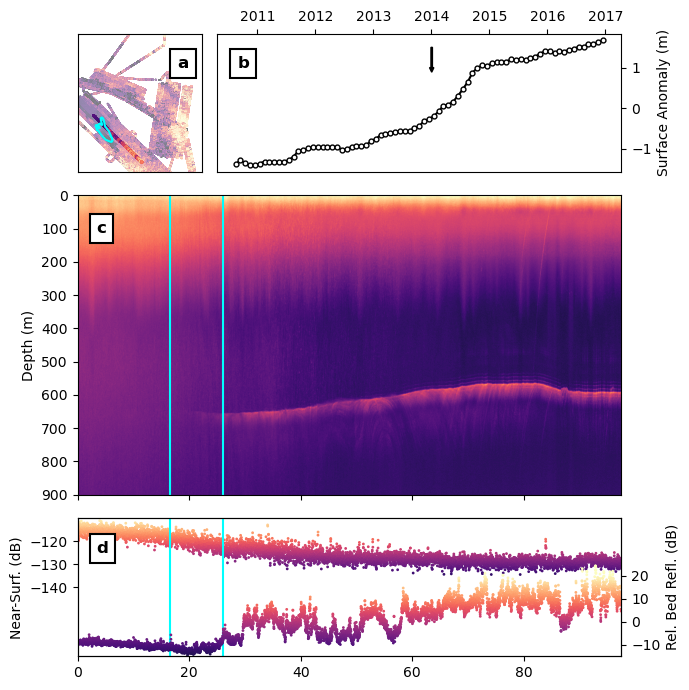

In [134]:
%matplotlib inline

plt.figure(figsize=(7,7))
gs = GridSpec(4,4)

start = 180
end = 950
bound_color='cyan'

### Panel A - Map View ###

ax1 = plt.subplot(gs[0,0])
ax1.tick_params(labelleft=False,labelbottom=False,left=False,bottom=False)
plt.scatter(df['X'],df['Y'],c=df['Relative Reflectivity'],zorder=1,cmap='magma',s=.1,vmin=-20,vmax=20,rasterized=True)
plt.fill_between(np.linspace(-1e8,1e8,10),-1e8,1e8,color='w',alpha=0.5)
plt.scatter(dat.x_coord,dat.y_coord,c=r_rel,s=1,zorder=2,cmap='magma',vmin=-20,vmax=20,rasterized=True)
lake = 'EngelhardtSubglacialLake'
plt.plot(np.squeeze(h5f[lake]['x'][:]),np.squeeze(h5f[lake]['y'][:]),c=bound_color,zorder=3)
plt.axis('equal')
plt.xlim(-300000,-120000)
plt.ylim(-660000,-520000)
ax1.text(0.8,.75,'a',transform=ax1.transAxes,fontweight='bold',fontsize=12,
         bbox=dict(facecolor='w', edgecolor='k', pad=5.0, linewidth=1.5))

### Panel B - Ice Surface through Time ###

radar_decyr = 2014+2/365.
ax2 = plt.subplot(gs[0,1:])
plt.plot(sle_y,sle_in-sle_out,'k-o',mfc='w',ms=3.5)
plt.arrow(radar_decyr,1.5,0,-.5,color='k',width=0.025)
ax2.xaxis.tick_top()
ax2.xaxis.set_label_position("top")
ax2.yaxis.tick_right()
ax2.yaxis.set_label_position("right")
ax2.text(0.05,.75,'b',transform=ax2.transAxes,fontweight='bold',fontsize=12,
         bbox=dict(facecolor='w', edgecolor='k', pad=5.0, linewidth=1.5))
plt.ylabel('Surface Anomaly (m)')

### Panel C - Radar Image ###

ax3 = plt.subplot(gs[1:3,:])
ax3.tick_params(labelbottom=False)
plt.imshow(dat.data,aspect='auto',vmin=-165,vmax=-100,cmap='magma',
          extent=[0,np.max(dat.dist),max(depth),min(depth)],rasterized=True)
plt.axvline(dat.dist[lake_start],color='cyan')
plt.axvline(dat.dist[lake_end],color='cyan')
plt.ylim(900,0)
plt.ylabel('Depth (m)')
ax3.text(0.035,.875,'c',transform=ax3.transAxes,fontweight='bold',fontsize=12,
         bbox=dict(facecolor='w', edgecolor='k', pad=5.0, linewidth=1.5))

### Panel D - Bed Echo Power ###

s = np.argmin(abs(depth-100))
nsp = dat.data[s]

ax4 = plt.subplot(gs[3,:],sharex=ax3)
plt.scatter(dat.dist,nsp,c=nsp,cmap='magma',s=1,vmin=-140,vmax=-110)
plt.axvline(dat.dist[lake_start],color='cyan')
plt.axvline(dat.dist[lake_end],color='cyan')
plt.ylim(-170,-110)
plt.yticks([-140,-130,-120])
plt.ylabel('Near-Surf. (dB)')
axt4 = plt.twinx(ax4)
plt.scatter(dat.dist,r_rel,c=r_rel,cmap='magma',s=1,vmin=-20,vmax=20)
plt.ylim(-15,45)
plt.yticks([-10,0,10,20])
plt.ylabel('Rel. Bed Refl. (dB)')
ax4.text(0.035,.75,'d',transform=ax4.transAxes,fontweight='bold',fontsize=12,
         bbox=dict(facecolor='w', edgecolor='k', pad=5.0, linewidth=1.5))

### Cleanup and Save ###
plt.tight_layout()
plt.savefig('fig-S2-4.png',dpi=300)

In [135]:
dname = standard_dir + '20131231_16'
fname = dname + '/Data_img_02_20131231_16_002.mat'
dat = load('mcords_mat',fname)[0]
dat.get_projected_coords('epsg:3031')    

layers = loadmat(layer_dir+dname[len(standard_dir):]+'/Data'+fname[-20:])['layerData']
b = layers[0][1][0][0][0][0][1][0][0][0][0]
s = layers[0][0][0][0][0][0][1][0][0][0][0]
bsamp = np.zeros_like(b)
ssamp = np.zeros_like(s)
p = np.empty_like(b)
for trace in range(dat.tnum):
    if np.isnan(b[trace]):
        bsamp[trace] = np.nan
        p[trace] = np.nan
    else:
        b_idx = np.argmin(abs(b[trace]-dat.travel_time*1e-6))
        bsamp[trace] = b_idx
    p[trace] = np.max(dat.data[b_idx-50:b_idx+50,trace])
    ### Reset the trace so that the first sample is at the ice surface rather than the airplane (for plotting) ###
    if np.isnan(s[trace]):
        s_idx = 1
        ssamp[trace] = np.nan
    else:
        s_idx = np.argmin(abs(s[trace]-dat.travel_time*1e-6))
        ssamp[trace] = s_idx
    dat.data[:-s_idx,trace] = dat.data[s_idx:,trace]
    dat.data[-s_idx:,trace] = np.nan

dat.elev = np.nan*np.ones(dat.tnum)
dat.reverse()
        
### Correct the bed power for spreading and attenuative losses ###
epsr_ice = 3.15
H = (b-s)*169e6/2.
h = s*300e6
G = 20*np.log10(2.*(h + H/np.sqrt(epsr_ice)))
N = 10
L = 2*N*H/1000.
r_rel = p + G + L
r_rel -= np.nanmean(r_rel)
r_rel = r_rel[::-1]

### Adjust time and depth vectors for updated array ###
dat.travel_time -= dat.travel_time[0]
depth = dat.travel_time*169/2.

### Linear gain for plotting ###
dat.data += np.transpose(np.tile(np.linspace(0,20,dat.snum),(dat.tnum,1)))

Profile direction reversed


In [136]:
lake = 'Lake78'
lake_dists = np.empty_like(dat.x_coord)
for ii in range(len(dat.x_coord)):
    xx = dat.x_coord[ii]
    yy = dat.y_coord[ii]
    dist = np.sqrt((xx-np.squeeze(h5f[lake]['x'][:]))**2. + (yy-np.squeeze(h5f[lake]['y'][:]))**2.)
    lake_dists[ii] = min(dist)

lake_start = 0
lake_end = 0

i, ddist = 0, 0.
while ddist <= 0.:
    i += 1
    ddist = lake_dists[i] - lake_dists[i-1]
lake_start = i

i, ddist = len(lake_dists)-1, 0.
while ddist <= 0. or lake_dists[i] > 1000:
    i -= 1
    ddist = lake_dists[i] - lake_dists[i+1]
lake_end = i

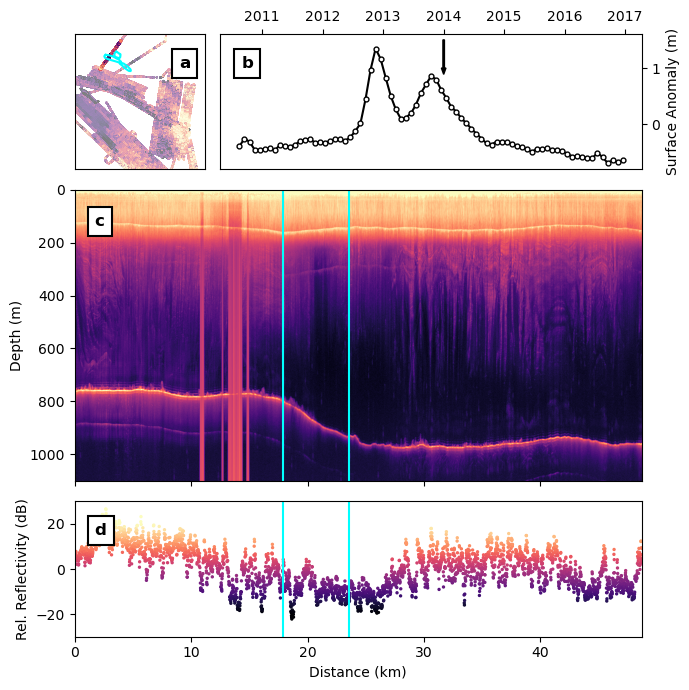

In [107]:
%matplotlib inline

plt.figure(figsize=(7,7))
gs = GridSpec(4,4)

start = 180
end = 950
bound_color='cyan'

### Panel A - Map View ###

ax1 = plt.subplot(gs[0,0])
ax1.tick_params(labelleft=False,labelbottom=False,left=False,bottom=False)
plt.scatter(df['X'],df['Y'],c=df['Relative Reflectivity'],zorder=1,cmap='magma',s=.1,vmin=-20,vmax=20,rasterized=True)
plt.fill_between(np.linspace(-1e8,1e8,10),-1e8,1e8,color='w',alpha=0.5)
plt.scatter(dat.x_coord,dat.y_coord,c=r_rel,s=1,zorder=2,cmap='magma',vmin=-20,vmax=20,rasterized=True)
lake = 'Lake78'
plt.plot(np.squeeze(h5f[lake]['x'][:]),np.squeeze(h5f[lake]['y'][:]),c=bound_color,zorder=3)
plt.axis('equal')
plt.xlim(-300000,-120000)
plt.ylim(-660000,-520000)
ax1.text(0.8,.75,'a',transform=ax1.transAxes,fontweight='bold',fontsize=12,
         bbox=dict(facecolor='w', edgecolor='k', pad=5.0, linewidth=1.5))

### Panel B - Ice Surface through Time ###

radar_decyr = 2013+365/365.
ax2 = plt.subplot(gs[0,1:])
plt.plot(l78_y,l78_in-l78_out,'k-o',mfc='w',ms=3.5)
plt.arrow(radar_decyr,1.5,0,-.5,color='k',width=0.025)
ax2.xaxis.tick_top()
ax2.xaxis.set_label_position("top")
ax2.yaxis.tick_right()
ax2.yaxis.set_label_position("right")
ax2.text(0.05,.75,'b',transform=ax2.transAxes,fontweight='bold',fontsize=12,
         bbox=dict(facecolor='w', edgecolor='k', pad=5.0, linewidth=1.5))
plt.ylabel('Surface Anomaly (m)')

### Panel C - Radar Image ###

ax3 = plt.subplot(gs[1:3,:])
ax3.tick_params(labelbottom=False)
plt.imshow(dat.data,aspect='auto',vmin=-165,vmax=-100,cmap='magma',
          extent=[0,np.max(dat.dist),max(depth),min(depth)],rasterized=True)
plt.axvline(dat.dist[lake_start],color='cyan')
plt.axvline(dat.dist[lake_end],color='cyan')
plt.ylim(1100,0)
plt.ylabel('Depth (m)')
ax3.text(0.035,.875,'c',transform=ax3.transAxes,fontweight='bold',fontsize=12,
         bbox=dict(facecolor='w', edgecolor='k', pad=5.0, linewidth=1.5))

### Panel D - Bed Echo Power ###

ax4 = plt.subplot(gs[3,:],sharex=ax3)
plt.scatter(dat.dist,r_rel,c=r_rel,vmin=-20,vmax=20,s=2,rasterized=True,cmap='magma')
plt.axvline(dat.dist[lake_start],color='cyan')
plt.axvline(dat.dist[lake_end],color='cyan')
plt.ylabel('Rel. Reflectivity (dB)')
plt.xlabel('Distance (km)')
ax4.text(0.035,.75,'d',transform=ax4.transAxes,fontweight='bold',fontsize=12,
         bbox=dict(facecolor='w', edgecolor='k', pad=5.0, linewidth=1.5))
plt.ylim(-30,30)

### Cleanup and Save ###
plt.tight_layout()
plt.savefig('fig-S2-5.png',dpi=300)

In [108]:
dname = standard_dir + '20131231_03'
fname = dname + '/Data_img_02_20131231_03_001.mat'
dat = load('mcords_mat',fname)[0]
dat.get_projected_coords('epsg:3031')    

layers = loadmat(layer_dir+dname[len(standard_dir):]+'/Data'+fname[-20:])['layerData']
b = layers[0][1][0][0][0][0][1][0][0][0][0]
s = layers[0][0][0][0][0][0][1][0][0][0][0]
bsamp = np.zeros_like(b)
ssamp = np.zeros_like(s)
p = np.empty_like(b)
for trace in range(dat.tnum):
    if np.isnan(b[trace]):
        bsamp[trace] = np.nan
        p[trace] = np.nan
    else:
        b_idx = np.argmin(abs(b[trace]-dat.travel_time*1e-6))
        bsamp[trace] = b_idx
    p[trace] = np.max(dat.data[b_idx-50:b_idx+50,trace])
    ### Reset the trace so that the first sample is at the ice surface rather than the airplane (for plotting) ###
    if np.isnan(s[trace]):
        s_idx = 1
        ssamp[trace] = np.nan
    else:
        s_idx = np.argmin(abs(s[trace]-dat.travel_time*1e-6))
        ssamp[trace] = s_idx
    dat.data[:-s_idx,trace] = dat.data[s_idx:,trace]
    dat.data[-s_idx:,trace] = np.nan
        
### Correct the bed power for spreading and attenuative losses ###
epsr_ice = 3.15
H = (b-s)*169e6/2.
h = s*300e6
G = 20*np.log10(2.*(h + H/np.sqrt(epsr_ice)))
N = 10
L = 2*N*H/1000.
r_rel = p + G + L
r_rel -= np.nanmean(r_rel)

### Adjust time and depth vectors for updated array ###
dat.travel_time -= dat.travel_time[0]
depth = dat.travel_time*169/2.

### Linear gain for plotting ###
dat.data += np.transpose(np.tile(np.linspace(0,20,dat.snum),(dat.tnum,1)))

In [109]:
lake_dists = np.empty_like(dat.x_coord)
for ii in range(len(dat.x_coord)):
    xx = dat.x_coord[ii]
    yy = dat.y_coord[ii]
    dist = np.sqrt((xx-np.squeeze(h5f[lake]['x'][:]))**2. + (yy-np.squeeze(h5f[lake]['y'][:]))**2.)
    lake_dists[ii] = min(dist)

lake_start = 0
lake_end = 0

i, ddist = 0, 0.
while ddist <= 0.:
    i += 1
    ddist = lake_dists[i] - lake_dists[i-1]
lake_start = i

i, ddist = len(lake_dists)-1, 0.
while ddist <= 0. or lake_dists[i] > 1000:
    i -= 1
    ddist = lake_dists[i] - lake_dists[i+1]
lake_end = i

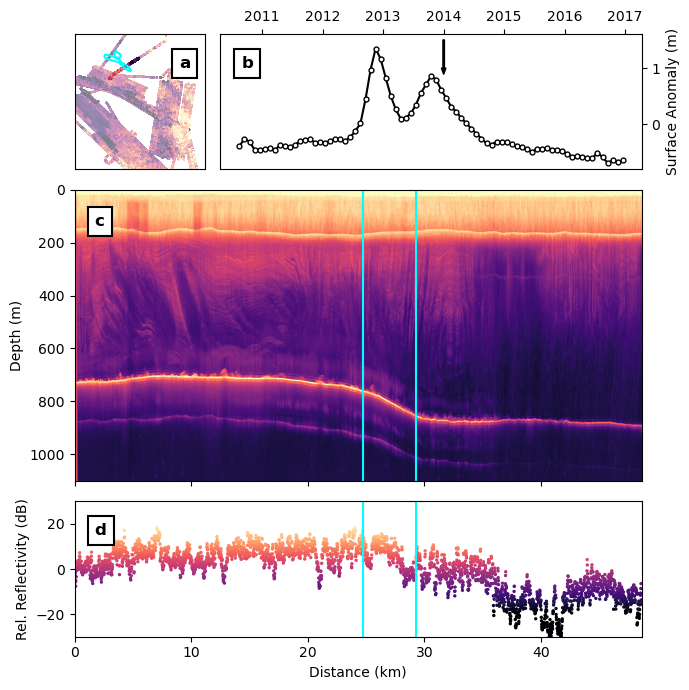

In [110]:
%matplotlib inline

plt.figure(figsize=(7,7))
gs = GridSpec(4,4)

start = 180
end = 950
bound_color='cyan'

### Panel A - Map View ###

ax1 = plt.subplot(gs[0,0])
ax1.tick_params(labelleft=False,labelbottom=False,left=False,bottom=False)
plt.scatter(df['X'],df['Y'],c=df['Relative Reflectivity'],zorder=1,cmap='magma',s=.1,vmin=-20,vmax=20,rasterized=True)
plt.fill_between(np.linspace(-1e8,1e8,10),-1e8,1e8,color='w',alpha=0.5)
plt.scatter(dat.x_coord,dat.y_coord,c=r_rel,s=1,zorder=2,cmap='magma',vmin=-20,vmax=20,rasterized=True)
lake = 'Lake78'
plt.plot(np.squeeze(h5f[lake]['x'][:]),np.squeeze(h5f[lake]['y'][:]),c=bound_color,zorder=3)
plt.axis('equal')
plt.xlim(-300000,-120000)
plt.ylim(-660000,-520000)
ax1.text(0.8,.75,'a',transform=ax1.transAxes,fontweight='bold',fontsize=12,
         bbox=dict(facecolor='w', edgecolor='k', pad=5.0, linewidth=1.5))

### Panel B - Ice Surface through Time ###

radar_decyr = 2013+365/365.
ax2 = plt.subplot(gs[0,1:])
plt.plot(l78_y,l78_in-l78_out,'k-o',mfc='w',ms=3.5)
plt.arrow(radar_decyr,1.5,0,-.5,color='k',width=0.025)
ax2.xaxis.tick_top()
ax2.xaxis.set_label_position("top")
ax2.yaxis.tick_right()
ax2.yaxis.set_label_position("right")
ax2.text(0.05,.75,'b',transform=ax2.transAxes,fontweight='bold',fontsize=12,
         bbox=dict(facecolor='w', edgecolor='k', pad=5.0, linewidth=1.5))
plt.ylabel('Surface Anomaly (m)')

### Panel C - Radar Image ###

ax3 = plt.subplot(gs[1:3,:])
ax3.tick_params(labelbottom=False)
plt.imshow(dat.data,aspect='auto',vmin=-165,vmax=-100,cmap='magma',
          extent=[0,np.max(dat.dist),max(depth),min(depth)],rasterized=True)
plt.axvline(dat.dist[lake_start],color='cyan')
plt.axvline(dat.dist[lake_end],color='cyan')
plt.ylim(1100,0)
plt.ylabel('Depth (m)')
ax3.text(0.035,.875,'c',transform=ax3.transAxes,fontweight='bold',fontsize=12,
         bbox=dict(facecolor='w', edgecolor='k', pad=5.0, linewidth=1.5))

### Panel D - Bed Echo Power ###

ax4 = plt.subplot(gs[3,:],sharex=ax3)
plt.scatter(dat.dist,r_rel,c=r_rel,vmin=-20,vmax=20,s=2,rasterized=True,cmap='magma')
plt.axvline(dat.dist[lake_start],color='cyan')
plt.axvline(dat.dist[lake_end],color='cyan')
plt.ylabel('Rel. Reflectivity (dB)')
plt.xlabel('Distance (km)')
ax4.text(0.035,.75,'d',transform=ax4.transAxes,fontweight='bold',fontsize=12,
         bbox=dict(facecolor='w', edgecolor='k', pad=5.0, linewidth=1.5))
plt.ylim(-30,30)

### Cleanup and Save ###
plt.tight_layout()
plt.savefig('fig-S2-6.png',dpi=300)

In [117]:
dname = standard_dir + '20140109_03'
fname = dname + '/Data_img_02_20140109_03_005.mat'
dat = load('mcords_mat',fname)[0]
dat.get_projected_coords('epsg:3031')    

layers = loadmat(layer_dir+dname[len(standard_dir):]+'/Data'+fname[-20:])['layerData']
b = layers[0][1][0][0][0][0][1][0][0][0][0]
s = layers[0][0][0][0][0][0][1][0][0][0][0]
bsamp = np.zeros_like(b)
ssamp = np.zeros_like(s)
p = np.empty_like(b)
for trace in range(dat.tnum):
    if np.isnan(b[trace]):
        bsamp[trace] = np.nan
        p[trace] = np.nan
    else:
        b_idx = np.argmin(abs(b[trace]-dat.travel_time*1e-6))
        bsamp[trace] = b_idx
    p[trace] = np.max(dat.data[b_idx-50:b_idx+50,trace])
    ### Reset the trace so that the first sample is at the ice surface rather than the airplane (for plotting) ###
    if np.isnan(s[trace]):
        s_idx = 1
        ssamp[trace] = np.nan
    else:
        s_idx = np.argmin(abs(s[trace]-dat.travel_time*1e-6))
        ssamp[trace] = s_idx
    dat.data[:-s_idx,trace] = dat.data[s_idx:,trace]
    dat.data[-s_idx:,trace] = np.nan
        
### Correct the bed power for spreading and attenuative losses ###
epsr_ice = 3.15
H = (b-s)*169e6/2.
h = s*300e6
G = 20*np.log10(2.*(h + H/np.sqrt(epsr_ice)))
N = 10
L = 2*N*H/1000.
r_rel = p + G + L
r_rel -= np.nanmean(r_rel)

### Adjust time and depth vectors for updated array ###
dat.travel_time -= dat.travel_time[0]
depth = dat.travel_time*169/2.

### Linear gain for plotting ###
dat.data += np.transpose(np.tile(np.linspace(0,20,dat.snum),(dat.tnum,1)))

In [118]:
lake = 'Lake10'
lake_dists = np.empty_like(dat.x_coord)
for ii in range(len(dat.x_coord)):
    xx = dat.x_coord[ii]
    yy = dat.y_coord[ii]
    dist = np.sqrt((xx-np.squeeze(h5f[lake]['x'][:]))**2. + (yy-np.squeeze(h5f[lake]['y'][:]))**2.)
    lake_dists[ii] = min(dist)

lake_start = 0
lake_end = 0

i, ddist = 0, 0.
while ddist <= 0.:
    i += 1
    ddist = lake_dists[i] - lake_dists[i-1]
lake_start = i

i, ddist = len(lake_dists)-1, 0.
while ddist <= 0. or lake_dists[i] > 1000:
    i -= 1
    ddist = lake_dists[i] - lake_dists[i+1]
lake_end = i

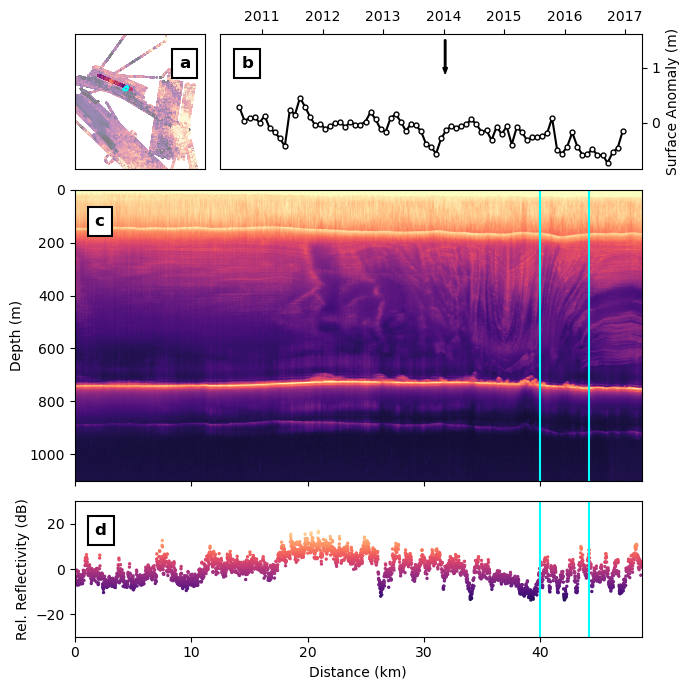

In [119]:
%matplotlib inline

plt.figure(figsize=(7,7))
gs = GridSpec(4,4)

start = 180
end = 950
bound_color='cyan'

### Panel A - Map View ###

ax1 = plt.subplot(gs[0,0])
ax1.tick_params(labelleft=False,labelbottom=False,left=False,bottom=False)
plt.scatter(df['X'],df['Y'],c=df['Relative Reflectivity'],zorder=1,cmap='magma',s=.1,vmin=-20,vmax=20,rasterized=True)
plt.fill_between(np.linspace(-1e8,1e8,10),-1e8,1e8,color='w',alpha=0.5)
plt.scatter(dat.x_coord,dat.y_coord,c=r_rel,s=1,zorder=2,cmap='magma',vmin=-20,vmax=20,rasterized=True)
plt.plot(np.squeeze(h5f[lake]['x'][:]),np.squeeze(h5f[lake]['y'][:]),c=bound_color,zorder=3)
plt.axis('equal')
plt.xlim(-300000,-120000)
plt.ylim(-660000,-520000)
ax1.text(0.8,.75,'a',transform=ax1.transAxes,fontweight='bold',fontsize=12,
         bbox=dict(facecolor='w', edgecolor='k', pad=5.0, linewidth=1.5))

### Panel B - Ice Surface through Time ###

radar_decyr = 2014+9/365.
ax2 = plt.subplot(gs[0,1:])
plt.plot(l10_y,l10_in-l10_out,'k-o',mfc='w',ms=3.5)
plt.arrow(radar_decyr,1.5,0,-.5,color='k',width=0.025)
ax2.xaxis.tick_top()
ax2.xaxis.set_label_position("top")
ax2.yaxis.tick_right()
ax2.yaxis.set_label_position("right")
ax2.text(0.05,.75,'b',transform=ax2.transAxes,fontweight='bold',fontsize=12,
         bbox=dict(facecolor='w', edgecolor='k', pad=5.0, linewidth=1.5))
plt.ylabel('Surface Anomaly (m)')

### Panel C - Radar Image ###

ax3 = plt.subplot(gs[1:3,:])
ax3.tick_params(labelbottom=False)
plt.imshow(dat.data,aspect='auto',vmin=-165,vmax=-100,cmap='magma',
          extent=[0,np.max(dat.dist),max(depth),min(depth)],rasterized=True)
plt.axvline(dat.dist[lake_start],color='cyan')
plt.axvline(dat.dist[lake_end],color='cyan')
plt.ylim(1100,0)
plt.ylabel('Depth (m)')
ax3.text(0.035,.875,'c',transform=ax3.transAxes,fontweight='bold',fontsize=12,
         bbox=dict(facecolor='w', edgecolor='k', pad=5.0, linewidth=1.5))

### Panel D - Bed Echo Power ###

ax4 = plt.subplot(gs[3,:],sharex=ax3)
plt.scatter(dat.dist,r_rel,c=r_rel,vmin=-20,vmax=20,s=2,rasterized=True,cmap='magma')
plt.axvline(dat.dist[lake_start],color='cyan')
plt.axvline(dat.dist[lake_end],color='cyan')
plt.ylabel('Rel. Reflectivity (dB)')
plt.xlabel('Distance (km)')
ax4.text(0.035,.75,'d',transform=ax4.transAxes,fontweight='bold',fontsize=12,
         bbox=dict(facecolor='w', edgecolor='k', pad=5.0, linewidth=1.5))
plt.ylim(-30,30)

### Cleanup and Save ###
plt.tight_layout()
plt.savefig('fig-S2-7.png',dpi=300)

In [120]:
dname = standard_dir + '20140109_03'
fname = dname + '/Data_img_02_20140109_03_003.mat'
dat = load('mcords_mat',fname)[0]
dat.get_projected_coords('epsg:3031')    

layers = loadmat(layer_dir+dname[len(standard_dir):]+'/Data'+fname[-20:])['layerData']
b = layers[0][1][0][0][0][0][1][0][0][0][0]
s = layers[0][0][0][0][0][0][1][0][0][0][0]
bsamp = np.zeros_like(b)
ssamp = np.zeros_like(s)
p = np.empty_like(b)
for trace in range(dat.tnum):
    if np.isnan(b[trace]):
        bsamp[trace] = np.nan
        p[trace] = np.nan
    else:
        b_idx = np.argmin(abs(b[trace]-dat.travel_time*1e-6))
        bsamp[trace] = b_idx
    p[trace] = np.max(dat.data[b_idx-50:b_idx+50,trace])
    ### Reset the trace so that the first sample is at the ice surface rather than the airplane (for plotting) ###
    if np.isnan(s[trace]):
        s_idx = 1
        ssamp[trace] = np.nan
    else:
        s_idx = np.argmin(abs(s[trace]-dat.travel_time*1e-6))
        ssamp[trace] = s_idx
    dat.data[:-s_idx,trace] = dat.data[s_idx:,trace]
    dat.data[-s_idx:,trace] = np.nan
        
### Correct the bed power for spreading and attenuative losses ###
epsr_ice = 3.15
H = (b-s)*169e6/2.
h = s*300e6
G = 20*np.log10(2.*(h + H/np.sqrt(epsr_ice)))
N = 10
L = 2*N*H/1000.
r_rel = p + G + L
r_rel -= np.nanmean(r_rel)

### Adjust time and depth vectors for updated array ###
dat.travel_time -= dat.travel_time[0]
depth = dat.travel_time*169/2.

dat.elev = np.nan*np.ones(dat.tnum)
dat.reverse()
r_rel = r_rel[::-1]

### Linear gain for plotting ###
dat.data += np.transpose(np.tile(np.linspace(0,20,dat.snum),(dat.tnum,1)))

Profile direction reversed


In [121]:
lake_dists = np.empty_like(dat.x_coord)
for ii in range(len(dat.x_coord)):
    xx = dat.x_coord[ii]
    yy = dat.y_coord[ii]
    dist = np.sqrt((xx-np.squeeze(h5f[lake]['x'][:]))**2. + (yy-np.squeeze(h5f[lake]['y'][:]))**2.)
    lake_dists[ii] = min(dist)

lake_start = 0
lake_end = 0

i, ddist = 0, 0.
while ddist <= 0.:
    i += 1
    ddist = lake_dists[i] - lake_dists[i-1]
lake_start = i

i, ddist = len(lake_dists)-1, 0.
while ddist <= 0. or lake_dists[i] > 1000:
    i -= 1
    ddist = lake_dists[i] - lake_dists[i+1]
lake_end = i

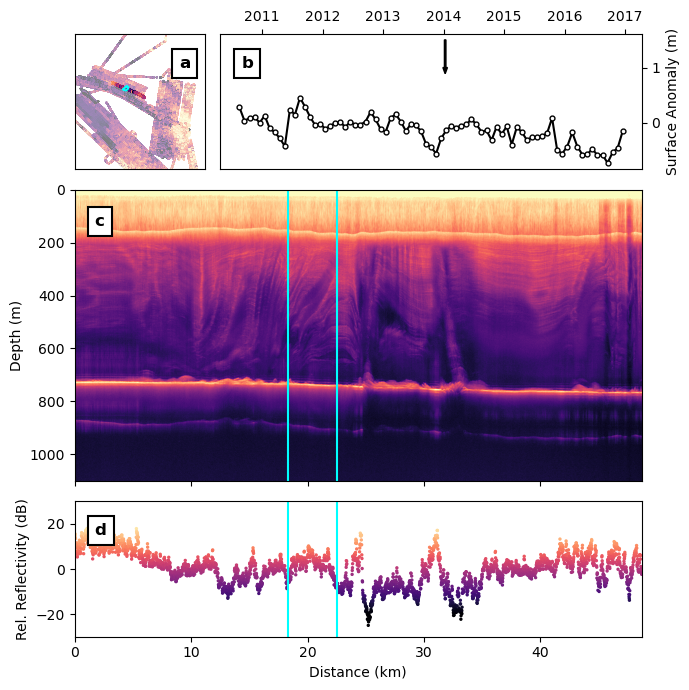

In [122]:
%matplotlib inline

plt.figure(figsize=(7,7))
gs = GridSpec(4,4)

start = 180
end = 950
bound_color='cyan'

### Panel A - Map View ###

ax1 = plt.subplot(gs[0,0])
ax1.tick_params(labelleft=False,labelbottom=False,left=False,bottom=False)
plt.scatter(df['X'],df['Y'],c=df['Relative Reflectivity'],zorder=1,cmap='magma',s=.1,vmin=-20,vmax=20,rasterized=True)
plt.fill_between(np.linspace(-1e8,1e8,10),-1e8,1e8,color='w',alpha=0.5)
plt.scatter(dat.x_coord,dat.y_coord,c=r_rel,s=1,zorder=2,cmap='magma',vmin=-20,vmax=20,rasterized=True)
plt.plot(np.squeeze(h5f[lake]['x'][:]),np.squeeze(h5f[lake]['y'][:]),c=bound_color,zorder=3)
plt.axis('equal')
plt.xlim(-300000,-120000)
plt.ylim(-660000,-520000)
ax1.text(0.8,.75,'a',transform=ax1.transAxes,fontweight='bold',fontsize=12,
         bbox=dict(facecolor='w', edgecolor='k', pad=5.0, linewidth=1.5))

### Panel B - Ice Surface through Time ###

radar_decyr = 2014+9/365.
ax2 = plt.subplot(gs[0,1:])
plt.plot(l10_y,l10_in-l10_out,'k-o',mfc='w',ms=3.5)
plt.arrow(radar_decyr,1.5,0,-.5,color='k',width=0.025)
ax2.xaxis.tick_top()
ax2.xaxis.set_label_position("top")
ax2.yaxis.tick_right()
ax2.yaxis.set_label_position("right")
ax2.text(0.05,.75,'b',transform=ax2.transAxes,fontweight='bold',fontsize=12,
         bbox=dict(facecolor='w', edgecolor='k', pad=5.0, linewidth=1.5))
plt.ylabel('Surface Anomaly (m)')

### Panel C - Radar Image ###

ax3 = plt.subplot(gs[1:3,:])
ax3.tick_params(labelbottom=False)
plt.imshow(dat.data,aspect='auto',vmin=-165,vmax=-100,cmap='magma',
          extent=[0,np.max(dat.dist),max(depth),min(depth)],rasterized=True)
plt.axvline(dat.dist[lake_start],color='cyan')
plt.axvline(dat.dist[lake_end],color='cyan')
plt.ylim(1100,0)
plt.ylabel('Depth (m)')
ax3.text(0.035,.875,'c',transform=ax3.transAxes,fontweight='bold',fontsize=12,
         bbox=dict(facecolor='w', edgecolor='k', pad=5.0, linewidth=1.5))

### Panel D - Bed Echo Power ###

ax4 = plt.subplot(gs[3,:],sharex=ax3)
plt.scatter(dat.dist,r_rel,c=r_rel,vmin=-20,vmax=20,s=2,rasterized=True,cmap='magma')
plt.axvline(dat.dist[lake_start],color='cyan')
plt.axvline(dat.dist[lake_end],color='cyan')
plt.ylabel('Rel. Reflectivity (dB)')
plt.xlabel('Distance (km)')
ax4.text(0.035,.75,'d',transform=ax4.transAxes,fontweight='bold',fontsize=12,
         bbox=dict(facecolor='w', edgecolor='k', pad=5.0, linewidth=1.5))
plt.ylim(-30,30)

### Cleanup and Save ###
plt.tight_layout()
plt.savefig('fig-S2-8.png',dpi=300)

In [ ]:
plt.figure(figsize=(8,8))
ax1 = plt.subplot(311)
plt.scatter(dist1,nsp1,c=nsp1,cmap='magma',s=1,vmin=-140,vmax=-110)
plt.ylim(-170,-110)
plt.yticks([-140,-130,-120])
plt.ylabel('Near-Surface Backscatter (dB)')
axt1 = plt.twinx(ax1)
plt.scatter(dist1,r_rel1,c=r_rel1,cmap='magma',s=1,vmin=-20,vmax=20)
plt.ylim(-15,45)
plt.yticks([-10,0,10,20])
plt.ylabel('Relative Bed Reflectivity (dB)')

ax1 = plt.subplot(312)
plt.scatter(dist2,nsp2,c=nsp2,cmap='magma',s=1,vmin=-140,vmax=-110)
plt.ylim(-170,-110)
plt.yticks([-140,-130,-120])
plt.ylabel('Near-Surface Backscatter (dB)')
axt1 = plt.twinx(ax1)
plt.scatter(dist2,r_rel2,c=r_rel2,cmap='magma',s=1,vmin=-20,vmax=20)
plt.ylim(-15,45)
plt.yticks([-10,0,10,20])
plt.ylabel('Relative Bed Reflectivity (dB)')

ax1 = plt.subplot(313)
plt.scatter(dist3,nsp3,c=nsp3,cmap='magma',s=1,vmin=-140,vmax=-110)
plt.ylim(-170,-110)
plt.yticks([-140,-130,-120])
plt.ylabel('Near-Surface Backscatter (dB)')
axt1 = plt.twinx(ax1)
plt.scatter(dist3,r_rel3,c=r_rel3,cmap='magma',s=1,vmin=-20,vmax=20)
plt.ylim(-15,45)
plt.yticks([-10,0,10,20])
plt.ylabel('Relative Bed Reflectivity (dB)')

plt.tight_layout()
plt.savefig('fig-S2-7.png',dpi=300)

In [ ]:
#standard_dir = '/Volumes/Amphitryon/cresis/Whillans/CSARP_standard/'
#layer_dir = '/Volumes/Amphitryon/cresis/Whillans/CSARP_layerData/'

dname = standard_dir + '20140108_05'
fname = dname + '/Data_20140108_05_003.mat'
dat = load('mcords_mat',fname)[0]
dat.get_projected_coords('epsg:3031')    

layers = loadmat(layer_dir+dname[len(standard_dir):]+'/Data'+fname[-20:])['layerData']
b = layers[0][1][0][0][0][0][1][0][0][0][0]
s = layers[0][0][0][0][0][0][1][0][0][0][0]
bsamp = np.zeros_like(b)
ssamp = np.zeros_like(s)
p = np.empty_like(b)
for trace in range(dat.tnum):
    if np.isnan(b[trace]):
        bsamp[trace] = np.nan
        p[trace] = np.nan
    else:
        b_idx = np.argmin(abs(b[trace]-dat.travel_time*1e-6))
        bsamp[trace] = b_idx
    p[trace] = np.max(dat.data[b_idx-50:b_idx+50,trace])
    ### Reset the trace so that the first sample is at the ice surface rather than the airplane (for plotting) ###
    if np.isnan(s[trace]):
        s_idx = 1
        ssamp[trace] = np.nan
    else:
        s_idx = np.argmin(abs(s[trace]-dat.travel_time*1e-6))
        ssamp[trace] = s_idx
    dat.data[:-s_idx,trace] = dat.data[s_idx:,trace]
    dat.data[-s_idx:,trace] = np.nan
        
### Correct the bed power for spreading and attenuative losses ###
epsr_ice = 3.15
H = (b-s)*169e6/2.
h = s*300e6
G = 20*np.log10(2.*(h + H/np.sqrt(epsr_ice)))
N = 10
L = 2*N*H/1000.
r_rel = p + G + L
r_rel -= np.nanmean(r_rel)

### Adjust time and depth vectors for updated array ###
dat.travel_time -= dat.travel_time[0]
depth = dat.travel_time*169/2.

### Linear gain for plotting ###
dat.data += np.transpose(np.tile(np.linspace(0,20,dat.snum),(dat.tnum,1)))

dat.elev = np.nan*np.ones(dat.tnum)
dat.reverse()
r_rel = r_rel[::-1]

In [ ]:
%matplotlib widget

plt.figure(figsize=(7,7))
gs = GridSpec(4,4)

start = 180
end = 950
bound_color='cyan'

### Panel A - Map View ###

ax1 = plt.subplot(gs[0,0])
#ax1.tick_params(labelleft=False,labelbottom=False,left=False,bottom=False)
gl_df[gl_df['Id_text']=='Grounded ice or land'].plot(ax=ax1)
plt.scatter(df['X'],df['Y'],c=df['Relative Reflectivity'],zorder=1,cmap='magma',s=.1,vmin=-20,vmax=20,rasterized=True)
plt.fill_between(np.linspace(-1e8,1e8,10),-1e8,1e8,color='w',alpha=0.5)
plt.scatter(dat.x_coord,dat.y_coord,c=r_rel,s=1,zorder=2,cmap='magma',vmin=-20,vmax=20,rasterized=True)
lake = 'EngelhardtSubglacialLake'
plt.plot(np.squeeze(h5f[lake]['x'][:]),np.squeeze(h5f[lake]['y'][:]),c=bound_color,zorder=3)
plt.axis('equal')
plt.xlim(-300000,-220000)
plt.ylim(-690000,-600000)
ax1.text(0.8,.75,'A',transform=ax1.transAxes,fontweight='bold',fontsize=12,
         bbox=dict(facecolor='w', edgecolor='k', pad=5.0, linewidth=1.5))

### Panel B - Ice Surface through Time ###

radar_decyr = 2014+8/365.
ax2 = plt.subplot(gs[0,1:])
plt.plot(sle_y,sle_in-sle_out,'k-o',mfc='w',ms=3.5)
plt.arrow(radar_decyr,1.5,0,-.5,color='k',width=0.025)
ax2.xaxis.tick_top()
ax2.xaxis.set_label_position("top")
ax2.yaxis.tick_right()
ax2.yaxis.set_label_position("right")
ax2.text(0.05,.75,'B',transform=ax2.transAxes,fontweight='bold',fontsize=12,
         bbox=dict(facecolor='w', edgecolor='k', pad=5.0, linewidth=1.5))
plt.ylabel('Surface Anomaly (m)')

### Panel C - Radar Image ###

ax3 = plt.subplot(gs[1:3,:])
ax3.tick_params(labelbottom=False)
plt.imshow(dat.data,aspect='auto',vmin=-165,vmax=-100,cmap='magma',
          extent=[0,np.max(dat.dist),max(depth),min(depth)],rasterized=True)
plt.ylim(1100,0)
plt.ylabel('Depth (m)')
ax3.text(0.035,.875,'C',transform=ax3.transAxes,fontweight='bold',fontsize=12,
         bbox=dict(facecolor='w', edgecolor='k', pad=5.0, linewidth=1.5))

### Panel D - Bed Echo Power ###

ax4 = plt.subplot(gs[3,:],sharex=ax3)
plt.scatter(dat.dist,r_rel,c=r_rel,vmin=-20,vmax=20,s=2,rasterized=True,cmap='magma')
plt.ylabel('Rel. Reflectivity (dB)')
plt.xlabel('Distance (km)')
ax4.text(0.035,.75,'D',transform=ax4.transAxes,fontweight='bold',fontsize=12,
         bbox=dict(facecolor='w', edgecolor='k', pad=5.0, linewidth=1.5))
plt.ylim(-30,30)

### Cleanup and Save ###
plt.tight_layout()
#plt.savefig('fig-S2-6.png',dpi=300)

In [ ]:
import geopandas as gpd
# Scripps Grounding Line
gl = '/Volumes/Amphitryon/continental-data-products/grounding-line/scripps/scripps_antarctica_polygons_v1.shp' 
#gl = '../../data/outlines/grounding-line/GroundingLine_Antarctica_v02./scripps_antarctica_polygons_v1.shp' 
gl_df = gpd.read_file(gl)

In [ ]:
df['S'] = df['Elevation'] - df['h']
df['B'] = df['S'] - df['H']

In [ ]:
g = 9.81
rhoi = 917.
rhow = 1000.
ϕ = rhow*g*df['B'].values + rhoi*g*df['H'].values

In [ ]:
ϕ/1e6

In [ ]:
plt.figure(figsize=(10,8))

ax1 = plt.subplot(221)
gl_df[gl_df['Id_text']=='Grounded ice or land'].plot(ax=ax1)
plt.scatter(df['X'],df['Y'],c=df['Relative Reflectivity'],zorder=1,cmap='magma',s=.1,vmin=-20,vmax=20,rasterized=True)
plt.colorbar(label='Relative Reflectivity')
plt.axis('equal')
plt.xlim(-270000,-220000)
plt.ylim(-680000,-650000)

ax2 = plt.subplot(222)
gl_df[gl_df['Id_text']=='Grounded ice or land'].plot(ax=ax2)
plt.scatter(df['X'],df['Y'],c=df['B'],zorder=1,cmap='magma',s=.1,vmin=-650,vmax=-450,rasterized=True)
plt.colorbar(label='Ice Bed Elevation')
plt.axis('equal')
plt.xlim(-270000,-220000)
plt.ylim(-680000,-650000)

ax3 = plt.subplot(223)
gl_df[gl_df['Id_text']=='Grounded ice or land'].plot(ax=ax3)
plt.scatter(df['X'],df['Y'],c=df['H'],zorder=1,cmap='magma',s=.1,vmin=400,vmax=700,rasterized=True)
plt.colorbar(label='Ice Thickness')
plt.axis('equal')
plt.xlim(-270000,-220000)
plt.ylim(-680000,-650000)

ax4 = plt.subplot(224)
gl_df[gl_df['Id_text']=='Grounded ice or land'].plot(ax=ax4)
plt.scatter(df['X'],df['Y'],c=ϕ/1e6,zorder=1,cmap='magma',s=.1,vmin=-.3,vmax=.2,rasterized=True)
plt.colorbar(label='Hydropotential (MPa)')
plt.axis('equal')
plt.xlim(-270000,-220000)
plt.ylim(-680000,-650000)

plt.tight_layout()
#""";

In [ ]:
SAkm = 361e6 # km2
SA = SAkm*1000**2.

DEkm = 1.2
DE = DEkm*1000**3.

print(DE/SA,'m')
print(DEkm/SAkm,'km')

In [ ]:
gl_df[0].plot()